# Elbow method na prática

In [15]:
# Biblioteca
import numpy as np
from sklearn import datasets as ds
from sklearn import cluster as ct
from matplotlib import pyplot as plt
from sklearn import metrics as mt

In [16]:
# Dados sintéticos
random_state = 0
X, y = ds.make_blobs( n_samples=100,
n_features=2,
centers=3,
cluster_std= 0.3,
random_state=random_state
)

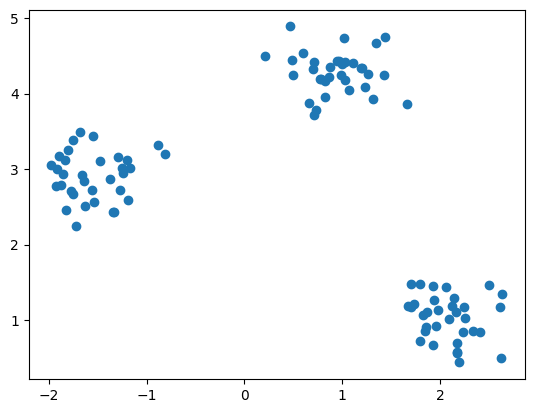

In [17]:
# Plot dos clusters
plt.scatter( X[:,0], X[:,1] )
# Elbo Method ( Método do Cotovelo )
clusters = np.arange( 2, 11, 1 )
ss_list = []

In [18]:
for c in clusters:
    # define
    kmeans = ct.KMeans( n_clusters=c, init='random', n_init=10, random_state=random_state )
    # fit
    labels = kmeans.fit_predict( X )
    # performance
    ss_avg = mt.silhouette_score( X, labels )
    print('Cluster K: {} - SS:{}'.format(c,ss_avg))
    # add silhouette to list
    ss_list.append( ss_avg )

Cluster K: 2 - SS:0.6460859591755024
Cluster K: 3 - SS:0.8206406418424526
Cluster K: 4 - SS:0.6646195228196582
Cluster K: 5 - SS:0.5035154297778502
Cluster K: 6 - SS:0.332231023014421
Cluster K: 7 - SS:0.3425112990077478
Cluster K: 8 - SS:0.3647601070822577
Cluster K: 9 - SS:0.3619628631828997
Cluster K: 10 - SS:0.3658047959970771


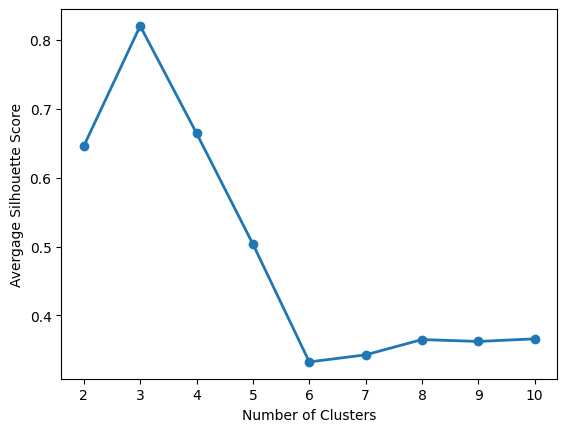

In [20]:
plt.plot( clusters, ss_list, marker='o', linewidth = 2 )
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Avergage Silhouette Score' );

Best K: 3


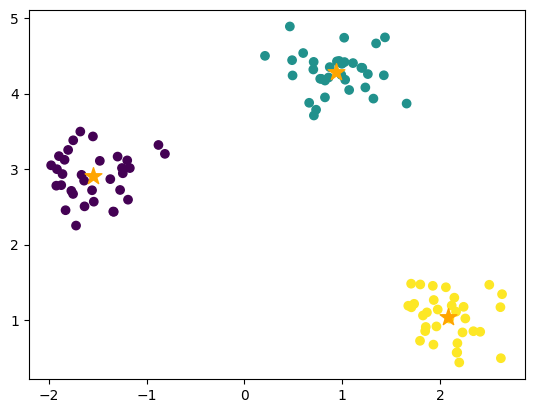

In [8]:
# Agruapmentos
c = ss_list.index( max( ss_list ) ) + 2
print( 'Best K: {}'.format( c ) )
# define
kmeans = ct.KMeans( n_clusters=c, init='random', n_init=10, random_state=random_state )
# fit
labels = kmeans.fit_predict( X )
# performance
ss_avg = mt.silhouette_score( X, labels )
# draw figure
plt.scatter( X[:, 0], X[:, 1], c=labels )

for i in range( len( kmeans.cluster_centers_ ) ):
    plt.scatter( kmeans.cluster_centers_[i, 0],
    kmeans.cluster_centers_[i, 1],
    marker='*',
    c='orange',
    s=160 )

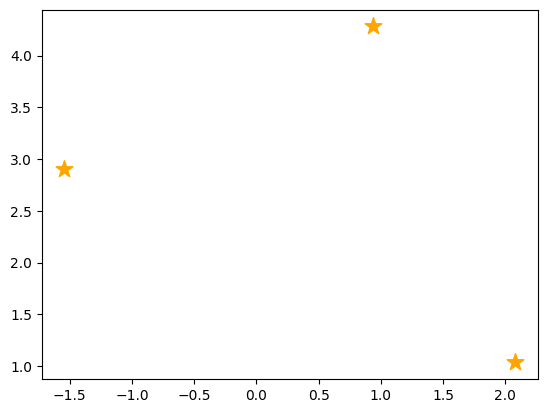